In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
#%matplotlib notebook

# use following for pdf generation
%matplotlib inline

from shapely.geometry import Point, Polygon, LineString
from shapely import plotting

In [2]:
class CollisionChecker(object):

    def __init__(self, scene, limits = [[0.0,22.0],[0.0,22.0]], statistic = None):
        self.scene = scene
        self.limits = limits
        
    def getDim(self):
        """ Return dimension of Environment (Shapely should currently always be 2)"""
        return 2
    
    def getEnvironmentLimits(self):
        """ Return limits of Environment"""
        return list(self.limits)

    def pointInCollision(self, pos):
        """ Return whether a configuration is
        inCollision -> True
        Free -> False """
        assert(len(pos)==self.getDim())
        for key, value in self.scene.items():
            if value.intersects(Point(pos[0],pos[1])):              
                return True
        return False

    def lineInCollision(self, startPos, endPos):
        """ Check whether a line from startPos to endPos is colliding"""
        assert(len(startPos)==self.getDim())
        assert(len(endPos)==self.getDim())
       
        for key, value in self.scene.items():
            if value.intersects(LineString([(startPos[0],startPos[1]),(endPos[0],endPos[1])])):
                return True
        return False
    
    def drawObstacles(self, ax):
        for key, value in self.scene.items():
            plotting.plot_polygon(value, add_points=False, ax=ax)

In [3]:
mid_scene = dict()
mid_scene["obs1"] = LineString([(3,7), (3,17), (19,17),(19,7)]).buffer(0.5)
mid_scene["obs2"] = LineString([[3,5],[19,5]]).buffer(0.5)

In [4]:
start_config_mid = [7.5, 20]
goal_config_mid =  [12.5, 12.5]

In [5]:
cc_mid = CollisionChecker(mid_scene)

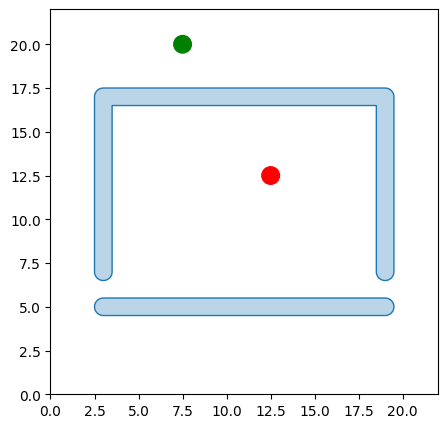

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
limits = cc_mid.getEnvironmentLimits()
ax.set_xlim(limits[0])
ax.set_ylim(limits[1])

ax.add_patch(Circle(start_config_mid, radius=0.5, color='g', zorder=9, label='Start'))
ax.add_patch(Circle(goal_config_mid, radius=0.5, color='r', zorder=9, label='Start'))

cc_mid.drawObstacles(ax)

In [7]:
# Create a labyrinth scene with many walls
hard_scene = dict()

# Outer boundaries
hard_scene["outer_top"] = LineString([(1, 21), (21, 21)]).buffer(0.3)
hard_scene["outer_bottom"] = LineString([(1, 1), (21, 1)]).buffer(0.3)
hard_scene["outer_left"] = LineString([(1, 1), (1, 21)]).buffer(0.3)
hard_scene["outer_right"] = LineString([(21, 1), (21, 21)]).buffer(0.3)

# Vertical walls
for i in range(3, 20, 4):
    hard_scene[f"vwall_{i}"] = LineString([(i, 3), (i, 19)]).buffer(0.2)

# Horizontal walls
for j in range(12, 20, 4):
    hard_scene[f"hwall_{j}"] = LineString([(3, j), (20, j)]).buffer(0.2)

# Horizontal walls open
for j in range(4, 12, 4):
    hard_scene[f"hwall_openLeft_{j}"] = LineString([(3, j), (11.5, j)]).buffer(0.2)
    hard_scene[f"hwall_openRight_{j}"] = LineString([(14.5, j), (20, j)]).buffer(0.2)

# Add some inner blocks
hard_scene["block1"] = Polygon([(6, 6), (7, 6), (7, 7), (6, 7)]).buffer(0.3)
hard_scene["block2"] = Polygon([(14, 14), (15, 14), (15, 15), (14, 15)]).buffer(0.3)
hard_scene["block3"] = Polygon([(10, 10), (11, 10), (11, 11), (10, 11)]).buffer(0.3)

In [8]:
start_config_hard = [8, 18]
goal_config_hard =  [13, 10]

In [9]:
cc_hard = CollisionChecker(hard_scene)

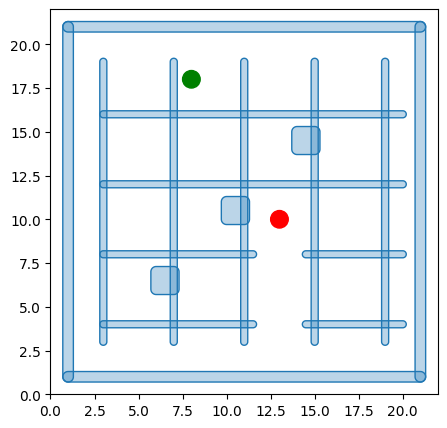

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
limits = cc_hard.getEnvironmentLimits()
ax.set_xlim(limits[0])
ax.set_ylim(limits[1])

ax.add_patch(Circle(start_config_hard, radius=0.5, color='g', zorder=9, label='Start'))
ax.add_patch(Circle(goal_config_hard, radius=0.5, color='r', zorder=9, label='Start'))

cc_hard.drawObstacles(ax)